# Lab 4
Owen Goodwin (500909196)

10/01/19

## Exercise 1

In [9]:
from mySolution import *
main()

1. To control the pen size, I've added an additional parameter ``pen``, which we reduce by one each time we call the ``tree()`` function recursively. In ``main()``, we set ``pen`` to 5, and ``tree()`` makes sure that the value for ``pen`` doesn't go below 1, for obvious reasons.

2. By default, the colour of the branches is brown, but once the length of a branch dips below 35, we use dark green to draw. Once the branch length dips below 15, we go a step further and draw in a lighter shade of green. This gives our tree a slightly realistic splash of colour

3. We choose an angle between 15 and 45 degrees. This means our tree might end up overlapping a bit, but real-world trees do as well, so it's no big deal.

4. We subtract a random value between 5 and 15 from the length of each subsequent segment. It's a bit higher than recommended, but it gives a bit more variety.

### The modified ``tree()`` function follows below.

In [ ]:
import turtle, sys, random

def tree(branchLen, t, pen):
    if pen < 1:
        pen = 1
    t.pensize(pen)
    col = "brown"
    if branchLen < 15:
        col = "green"
    elif branchLen < 35:
        col = "darkgreen"
    t.color(col)
    if branchLen > 5:
        t.forward(branchLen)
        angle = random.randint(15, 45)
        less = random.randint(5, 15)
        t.right(angle)
        tree(branchLen-less, t, pen-1)
        t.left(angle*2)
        tree(branchLen-less, t, pen-1)
        t.right(angle)
        t.backward(branchLen)
        t.color(col)

def main():
    pen = 5
    t = turtle.Turtle()
    myWin = turtle.Screen()
    # turtle.tracer(0) # for instant tree
    t.speed(0)
    t.left(90)
    t.up()
    t.backward(200)
    t.down()
    t.color("brown")
    tree(75, t, pen)

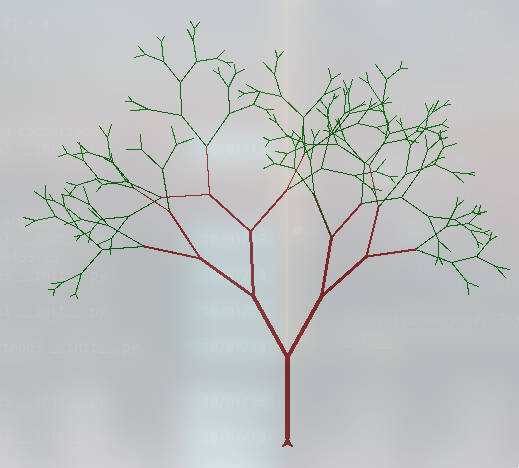
An example tree generated by my code.

## Exercise 2

In [10]:
from mySolution import *
print("Using the power() function, 8^4 is: " + str(power(8, 4)))
print("Using the powerH() function, 3^7 is: " + str(powerH(3, 7)))
print("Using the binary() function, the binary coefficient of 15 and 10 is: " + str(binary(15, 10)))

Using the power() function, 8^4 is: 4096
Using the powerH() function, 3^7 is: 2187
Using the binary() function, the binary coefficient of 15 and 10 is: 3003


The original ``power()`` function starts an accumulator ``acc`` at 1, and recursively calls itself. Each call replaces the accumulator with ``acc * x`` (x is the base number), and decrements ``n``, the exponent, by one. The base case here is when ``n == 0``, at which point we return the final accumulator value.

The upgraded ``powerH()`` works a little differently. It still has an accumulator, but this time with each recursive call we square ``x`` and cut ``n`` in half. In the case where ``n`` is odd, we also multiply the accumulator by ``x``.

The ``binomial()`` function is pretty simple. The two numbers we are finding the binomial coefficient of are referred to as ``n`` and ``k``. We assume that ``n >= k``. To construct our return value, we recursively call ``binomial(n-1, k)`` and ``binomial(n-1, k-1)``. The sum of these two recursive calls is our binomial coefficient. The recursion stops once ``n == k`` or when ``k == 0``.

### The three functions are shown below.

In [11]:
def power(x, n, acc=1):
    if n == 0:
        return acc
    return power(x, n - 1, acc * x)

def powerH(x, n, acc=1):
    if n == 0:
        return acc
    elif n % 2 != 0:
        return powerH(x * x, n // 2, acc * x)
    else:
        return powerH(x * x, n // 2, acc)
    
def binomial(n, k):
    if (n == k) or (k == 0):
        return 1
    else:
        return binomial(n-1, k) + binomial(n-1, k-1)